In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_wine
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('modified_dataset.csv')

In [ ]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,dummy
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN


In [ ]:
dataset.isnull().sum()

Unnamed: 0                     0
trans_date_trans_time          0
cc_num                         0
merchant                       0
category                       0
amt                         1302
first                          0
last                           0
gender                         0
street                         0
city                           0
state                          0
zip                            0
lat                            0
long                           0
city_pop                       0
job                            0
dob                            0
trans_num                      0
unix_time                      0
merch_lat                      0
merch_long                     0
is_fraud                       0
dummy                    1295410
dtype: int64

In [ ]:
# dataset = dataset.drop(['dummy'],axis=1) #Axis = 1 means column removed

if 'dummy' in dataset.columns:
    dataset = dataset.drop(['dummy'], axis=1)

In [ ]:
dataset.isnull().sum()

Unnamed: 0                  0
trans_date_trans_time       0
cc_num                      0
merchant                    0
category                    0
amt                      1302
first                       0
last                        0
gender                      0
street                      0
city                        0
state                       0
zip                         0
lat                         0
long                        0
city_pop                    0
job                         0
dob                         0
trans_num                   0
unix_time                   0
merch_lat                   0
merch_long                  0
is_fraud                    0
dtype: int64

In [ ]:
# dataset = dataset[dataset['amt'].notnull()]

In [ ]:

impute = SimpleImputer(missing_values=np.nan, strategy='mean')
impute.fit(dataset[['amt']])
dataset['amt'] = impute.transform(dataset[['amt']])

In [ ]:
dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
dataset.is_fraud.sum()

7506

In [ ]:
dataset.keys() #merchant, category, first, last, gender, street, city, state, job

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# merchant encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['merchant_enc'] = enc.fit_transform(dataset['merchant'])
# Compare the two columns
dataset[['merchant','merchant_enc']]

,merchant,merchant_enc
0,"fraud_Rippin, Kub and Mann",514
1,"fraud_Heller, Gutmann and Zieme",241
2,fraud_Lind-Buckridge,390
3,"fraud_Kutch, Hermiston and Farrell",360
4,fraud_Keeling-Crist,297
...,...,...
1296670,fraud_Reichel Inc,499
1296671,fraud_Abernathy and Sons,2
1296672,fraud_Stiedemann Ltd,599
1296673,"fraud_Reinger, Weissnat and Strosin",509


In [ ]:
# category encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['category_enc'] = enc.fit_transform(dataset['category'])
# Compare the two columns
dataset[['category','category_enc']]

,category,category_enc
0,misc_net,8
1,grocery_pos,4
2,entertainment,0
3,gas_transport,2
4,misc_pos,9
...,...,...
1296670,entertainment,0
1296671,food_dining,1
1296672,food_dining,1
1296673,food_dining,1


In [ ]:
# first encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['first_enc'] = enc.fit_transform(dataset['first'])
# Compare the two columns
dataset[['first','first_enc']]

,first,first_enc
0,Jennifer,162
1,Stephanie,309
2,Edward,115
3,Jeremy,163
4,Tyler,336
...,...,...
1296670,Erik,121
1296671,Jeffrey,160
1296672,Christopher,74
1296673,Joseph,179


In [ ]:
# last encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['last_enc'] = enc.fit_transform(dataset['last'])
# Compare the two columns
dataset[['last','last_enc']]

,last,last_enc
0,Banks,18
1,Gill,157
2,Sanchez,381
3,White,463
4,Garcia,149
...,...,...
1296670,Patterson,332
1296671,White,463
1296672,Castaneda,67
1296673,Murray,304


In [ ]:
# gender encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['gender_enc'] = enc.fit_transform(dataset['gender'])
# Compare the two columns
dataset[['gender','gender_enc']]

,gender,gender_enc
0,F,0
1,F,0
2,M,1
3,M,1
4,M,1
...,...,...
1296670,M,1
1296671,M,1
1296672,M,1
1296673,M,1


In [ ]:
# street encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['street_enc'] = enc.fit_transform(dataset['street'])
# Compare the two columns
dataset[['street','street_enc']]

,street,street_enc
0,561 Perry Cove,568
1,43039 Riley Greens Suite 393,435
2,594 White Dale Suite 530,602
3,9443 Cynthia Court Apt. 038,930
4,408 Bradley Rest,418
...,...,...
1296670,162 Jessica Row Apt. 072,154
1296671,8617 Holmes Terrace Suite 651,856
1296672,1632 Cohen Drive Suite 639,158
1296673,42933 Ryan Underpass,433


In [ ]:
# city encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['city_enc'] = enc.fit_transform(dataset['city'])
# Compare the two columns
dataset[['city','city_enc']]

,city,city_enc
0,Moravian Falls,526
1,Orient,612
2,Malad City,468
3,Boulder,84
4,Doe Hill,216
...,...,...
1296670,Hatch,330
1296671,Tuscarora,813
1296672,High Rolls Mountain Park,346
1296673,Manderson,471


In [ ]:
# state encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['state_enc'] = enc.fit_transform(dataset['state'])
# Compare the two columns
dataset[['state','state_enc']]

,state,state_enc
0,NC,27
1,WA,47
2,ID,13
3,MT,26
4,VA,45
...,...,...
1296670,UT,44
1296671,MD,20
1296672,NM,32
1296673,SD,41


In [ ]:
# job encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['job_enc'] = enc.fit_transform(dataset['job'])
# Compare the two columns
dataset[['job','job_enc']]

,job,job_enc
0,"Psychologist, counselling",370
1,Special educational needs teacher,428
2,Nature conservation officer,307
3,Patent attorney,328
4,Dance movement psychotherapist,116
...,...,...
1296670,Geoscientist,215
1296671,"Production assistant, television",360
1296672,Naval architect,308
1296673,Volunteer coordinator,485


In [ ]:
# dob encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['dob_enc'] = enc.fit_transform(dataset['dob'])
# Compare the two columns
dataset[['dob','dob_enc']]

,dob,dob_enc
0,1988-03-09,779
1,1978-06-21,607
2,1962-01-19,302
3,1967-01-12,397
4,1986-03-28,734
...,...,...
1296670,1961-11-24,298
1296671,1979-12-11,630
1296672,1967-08-30,412
1296673,1980-08-18,639


In [ ]:
# job encoding
enc = LabelEncoder()
# Apply the encoding to the "Accessible" column
dataset['trans_num_enc'] = enc.fit_transform(dataset['trans_num'])
# Compare the two columns
dataset[['trans_num','trans_num_enc']]

,trans_num,trans_num_enc
0,0b242abb623afc578575680df30655b9,56438
1,1f76529f8574734946361c461b024d99,159395
2,a1a22d70485983eac12b5b88dad1cf95,818703
3,6b849c168bdad6f867558c3793159a81,544575
4,a41d7549acf90789359a9aa5346dcb46,831111
...,...,...
1296670,440b587732da4dc1a6395aba5fb41669,344658
1296671,278000d2e0d2277d1de2f890067dcc0a,199896
1296672,483f52fe67fabef353d552c1e662974c,366013
1296673,d667cdcbadaaed3da3f4020e83591c83,1086299


In [ ]:
dataset['trans_date_trans_time']

0          2019-01-01 00:00:18
1          2019-01-01 00:00:44
2          2019-01-01 00:00:51
3          2019-01-01 00:01:16
4          2019-01-01 00:03:06
                  ...         
1296670    2020-06-21 12:12:08
1296671    2020-06-21 12:12:19
1296672    2020-06-21 12:12:32
1296673    2020-06-21 12:13:36
1296674    2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: object

In [ ]:
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])

# Extract the month using the .dt accessor
dataset['Month'] = dataset['trans_date_trans_time'].dt.month

In [ ]:
dataset['trans_date_trans_time']

0         2019-01-01 00:00:18
1         2019-01-01 00:00:44
2         2019-01-01 00:00:51
3         2019-01-01 00:01:16
4         2019-01-01 00:03:06
                  ...        
1296670   2020-06-21 12:12:08
1296671   2020-06-21 12:12:19
1296672   2020-06-21 12:12:32
1296673   2020-06-21 12:13:36
1296674   2020-06-21 12:13:37
Name: trans_date_trans_time, Length: 1296675, dtype: datetime64[ns]

In [ ]:
dataset['Month']

0          1
1          1
2          1
3          1
4          1
          ..
1296670    6
1296671    6
1296672    6
1296673    6
1296674    6
Name: Month, Length: 1296675, dtype: int64

In [ ]:
dataset.keys()

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merchant_enc', 'category_enc',
       'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc',
       'state_enc', 'job_enc', 'dob_enc', 'trans_num_enc', 'Month'],
      dtype='object')

In [ ]:
encoded_dataset = dataset[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob_enc', 'trans_num_enc', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merchant_enc', 'category_enc',
       'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc', 'job_enc', 'Month']]

In [ ]:
dcorr = encoded_dataset.corr()
dcorr

# dcorr = encoded_dataset.corr(numeric_only=True)
# dcorr

,cc_num,amt,zip,lat,long,city_pop,dob_enc,trans_num_enc,unix_time,merch_lat,...,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
cc_num,1.000000,0.001793,0.041459,-0.059271,-0.048278,-0.008991,0.002397,0.001415,0.000354,-0.058942,...,0.000055,0.001230,-0.027189,0.006908,0.001112,0.046509,0.049188,-0.036373,0.029165,-0.000281
amt,0.001793,1.000000,0.001807,-0.001907,-0.000145,0.005809,0.010626,-0.001324,-0.000301,-0.001854,...,-0.002661,0.030874,-0.003571,-0.004724,0.001044,0.001334,-0.000572,0.001742,-0.000633,-0.001749
zip,0.041459,0.001807,1.000000,-0.114290,-0.909732,0.078467,-0.013300,-0.000603,0.000670,-0.113561,...,0.001113,0.002371,0.004766,0.028295,-0.065951,-0.053860,0.074757,-0.116264,-0.005678,0.000852
lat,-0.059271,-0.001907,-0.114290,1.000000,-0.015533,-0.155730,-0.049734,-0.001601,0.000632,0.993592,...,-0.002266,-0.008660,0.131869,-0.034915,0.042935,-0.012651,-0.032044,0.213270,-0.027593,-0.001072
long,-0.048278,-0.000145,-0.909732,-0.015533,1.000000,-0.052715,0.031883,0.000904,-0.000642,-0.015452,...,-0.000697,-0.000767,-0.016475,-0.025557,0.050404,0.071328,-0.066703,0.132465,-0.002729,-0.001213
city_pop,-0.008991,0.005809,0.078467,-0.155730,-0.052715,1.000000,0.088756,0.000213,-0.001714,-0.154781,...,0.001911,0.009386,-0.066607,-0.012039,-0.028649,-0.012530,0.034923,-0.012197,-0.054945,0.000137
dob_enc,0.002397,0.010626,-0.013300,-0.049734,0.031883,0.088756,1.000000,0.000555,0.003629,-0.049343,...,0.006798,0.004347,0.004203,-0.019168,-0.012185,-0.042514,0.014330,0.054846,0.028402,-0.002439
trans_num_enc,0.001415,-0.001324,-0.000603,-0.001601,0.000904,0.000213,0.000555,1.000000,-0.000610,-0.001571,...,-0.000459,-0.000356,0.000878,0.000153,-0.000289,-0.001430,0.000798,-0.000183,0.000454,-0.001285
unix_time,0.000354,-0.000301,0.000670,0.000632,-0.000642,-0.001714,0.003629,-0.000610,1.000000,0.000561,...,-0.000999,0.000182,0.000483,0.000094,-0.000960,-0.001089,-0.000466,0.001071,0.000032,0.184868
merch_lat,-0.058942,-0.001854,-0.113561,0.993592,-0.015452,-0.154781,-0.049343,-0.001571,0.000561,1.000000,...,-0.002263,-0.008519,0.130964,-0.034548,0.042645,-0.012517,-0.031828,0.211844,-0.027412,-0.001116


<Axes: >

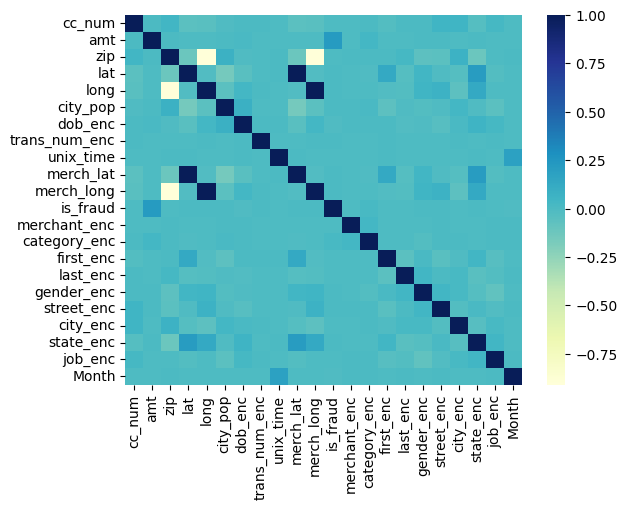

In [ ]:
sns.heatmap(dcorr, cmap = 'YlGnBu')

In [ ]:
# Removing zip, long, merch_long Colomns
encoded_dataset2 = dataset[['cc_num', 'amt', 'lat', 'city_pop', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'is_fraud', 'merchant_enc', 'category_enc',
       'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc', 'job_enc', 'Month']]

In [ ]:
# dcorr2 = encoded_dataset2.corr()
# dcorr2

dcorr2 = encoded_dataset2.corr(numeric_only=True)
dcorr2


,cc_num,amt,lat,city_pop,unix_time,merch_lat,is_fraud,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
cc_num,1.000000,0.001793,-0.059271,-0.008991,0.000354,-0.058942,-0.000981,0.000055,0.001230,-0.027189,0.006908,0.001112,0.046509,0.049188,-0.036373,0.029165,-0.000281
amt,0.001793,1.000000,-0.001907,0.005809,-0.000301,-0.001854,0.219223,-0.002661,0.030874,-0.003571,-0.004724,0.001044,0.001334,-0.000572,0.001742,-0.000633,-0.001749
lat,-0.059271,-0.001907,1.000000,-0.155730,0.000632,0.993592,0.001894,-0.002266,-0.008660,0.131869,-0.034915,0.042935,-0.012651,-0.032044,0.213270,-0.027593,-0.001072
city_pop,-0.008991,0.005809,-0.155730,1.000000,-0.001714,-0.154781,0.002136,0.001911,0.009386,-0.066607,-0.012039,-0.028649,-0.012530,0.034923,-0.012197,-0.054945,0.000137
unix_time,0.000354,-0.000301,0.000632,-0.001714,1.000000,0.000561,-0.005078,-0.000999,0.000182,0.000483,0.000094,-0.000960,-0.001089,-0.000466,0.001071,0.000032,0.184868
merch_lat,-0.058942,-0.001854,0.993592,-0.154781,0.000561,1.000000,0.001741,-0.002263,-0.008519,0.130964,-0.034548,0.042645,-0.012517,-0.031828,0.211844,-0.027412,-0.001116
is_fraud,-0.000981,0.219223,0.001894,0.002136,-0.005078,0.001741,1.000000,-0.000536,0.020205,-0.003219,-0.000096,0.007642,0.001448,-0.002092,0.001730,-0.000093,-0.012409
merchant_enc,0.000055,-0.002661,-0.002266,0.001911,-0.000999,-0.002263,-0.000536,1.000000,0.032302,-0.001576,-0.000439,-0.000915,0.000718,-0.000294,-0.000424,0.001360,0.000453
category_enc,0.001230,0.030874,-0.008660,0.009386,0.000182,-0.008519,0.020205,0.032302,1.000000,-0.001931,-0.004319,-0.028259,0.002258,0.000784,0.000211,0.003490,0.000768
first_enc,-0.027189,-0.003571,0.131869,-0.066607,0.000483,0.130964,-0.003219,-0.001576,-0.001931,1.000000,-0.056983,0.015197,-0.045369,-0.009211,0.043145,-0.039683,0.000162


<Axes: >

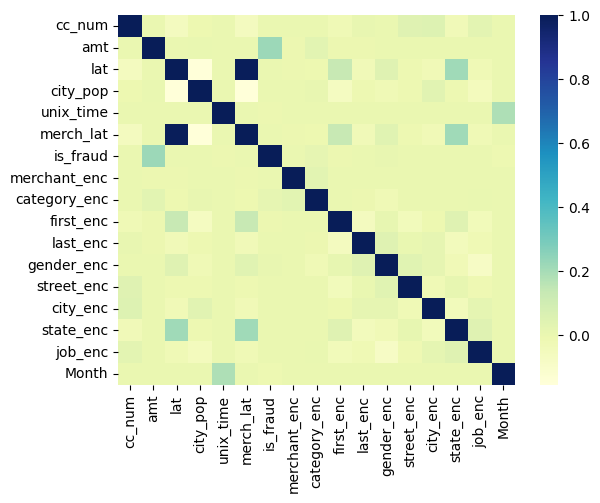

In [ ]:
sns.heatmap(dcorr2, cmap = 'YlGnBu')

In [ ]:
# Removing marchant_lat
encoded_dataset3 = dataset[['cc_num', 'amt', 'lat', 'city_pop', 'unix_time', 'is_fraud', 'merchant_enc',
                            'category_enc', 'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc',
                            'job_enc', 'Month']]

In [ ]:
dcorr3 = encoded_dataset3.corr()
dcorr3

,cc_num,amt,lat,city_pop,unix_time,is_fraud,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
cc_num,1.000000,0.001793,-0.059271,-0.008991,0.000354,-0.000981,0.000055,0.001230,-0.027189,0.006908,0.001112,0.046509,0.049188,-0.036373,0.029165,-0.000281
amt,0.001793,1.000000,-0.001907,0.005809,-0.000301,0.219223,-0.002661,0.030874,-0.003571,-0.004724,0.001044,0.001334,-0.000572,0.001742,-0.000633,-0.001749
lat,-0.059271,-0.001907,1.000000,-0.155730,0.000632,0.001894,-0.002266,-0.008660,0.131869,-0.034915,0.042935,-0.012651,-0.032044,0.213270,-0.027593,-0.001072
city_pop,-0.008991,0.005809,-0.155730,1.000000,-0.001714,0.002136,0.001911,0.009386,-0.066607,-0.012039,-0.028649,-0.012530,0.034923,-0.012197,-0.054945,0.000137
unix_time,0.000354,-0.000301,0.000632,-0.001714,1.000000,-0.005078,-0.000999,0.000182,0.000483,0.000094,-0.000960,-0.001089,-0.000466,0.001071,0.000032,0.184868
is_fraud,-0.000981,0.219223,0.001894,0.002136,-0.005078,1.000000,-0.000536,0.020205,-0.003219,-0.000096,0.007642,0.001448,-0.002092,0.001730,-0.000093,-0.012409
merchant_enc,0.000055,-0.002661,-0.002266,0.001911,-0.000999,-0.000536,1.000000,0.032302,-0.001576,-0.000439,-0.000915,0.000718,-0.000294,-0.000424,0.001360,0.000453
category_enc,0.001230,0.030874,-0.008660,0.009386,0.000182,0.020205,0.032302,1.000000,-0.001931,-0.004319,-0.028259,0.002258,0.000784,0.000211,0.003490,0.000768
first_enc,-0.027189,-0.003571,0.131869,-0.066607,0.000483,-0.003219,-0.001576,-0.001931,1.000000,-0.056983,0.015197,-0.045369,-0.009211,0.043145,-0.039683,0.000162
last_enc,0.006908,-0.004724,-0.034915,-0.012039,0.000094,-0.000096,-0.000439,-0.004319,-0.056983,1.000000,0.043740,0.005634,0.017553,-0.048161,-0.024596,0.001121


<Axes: >

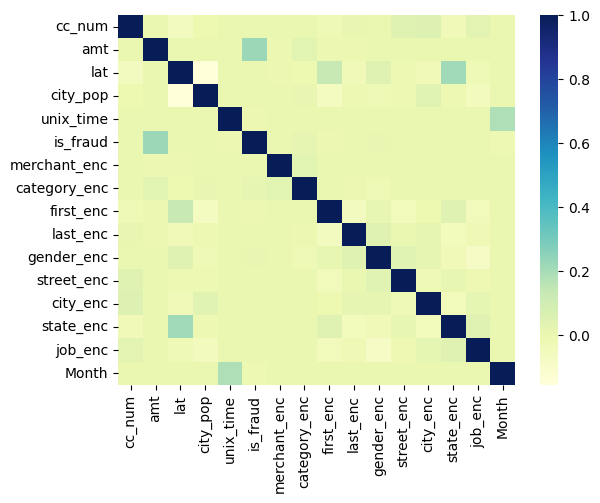

In [ ]:
sns.heatmap(dcorr3, cmap = 'YlGnBu')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['cc_num', 'amt', 'lat', 'city_pop', 'unix_time', 'merchant_enc',
                            'category_enc', 'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc',
                            'job_enc', 'Month']], dataset['is_fraud'], test_size=0.30, random_state=0)

In [ ]:
X_train

,cc_num,amt,lat,city_pop,unix_time,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
297985,213195754007681,57.13,41.2001,568,1337999778,590,2,351,5,1,689,605,12,93,5
1022427,30235438713303,55.25,38.5072,5512,1361955441,442,4,152,16,1,371,882,49,187,2
587036,6011438889172900,63.83,34.2853,5161,1346933917,670,12,8,5,0,417,203,2,147,9
754661,2348245054386329,29.66,42.1767,2518,1353256677,164,6,187,153,1,267,323,38,185,11
669998,180067151859700,45.32,41.5378,128354,1350081493,2,1,190,379,0,821,390,14,452,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,4792627764422477317,4.47,38.9462,5760,1339873487,544,13,225,283,0,800,202,16,74,6
152315,502012776709,147.01,42.6315,165,1332489429,602,4,303,260,0,136,284,34,308,3
963395,30199621383748,58.14,33.4044,4090,1358973115,170,1,326,345,0,107,439,43,436,1
117952,377993105397617,30.20,44.8755,5548,1331156436,586,0,256,260,1,590,600,48,298,3


In [ ]:
X_test

,cc_num,amt,lat,city_pop,unix_time,merchant_enc,category_enc,first_enc,last_enc,gender_enc,street_enc,city_enc,state_enc,job_enc,Month
364558,4005676619255478,125.02,30.4590,71335,1339975350,356,1,348,339,1,465,209,18,222,6
834017,344342339068828,3.10,31.3826,5989,1355268159,568,13,285,146,0,389,198,10,446,12
489882,3576431665303017,116.25,33.5623,1312922,1343909347,105,11,166,449,0,720,644,3,107,8
506493,4292743669224718067,49.01,38.2674,5927,1344383024,10,1,243,467,1,369,302,20,38,8
668183,4623560839669,158.76,42.2619,695,1350027778,336,4,342,445,1,922,451,12,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757189,4365382885912355,948.33,48.1439,1680,1353364063,238,11,281,162,1,947,614,23,229,11
1037465,3542162746848552,1.11,43.5089,744,1362561036,351,8,40,7,1,406,248,23,96,3
2840,4210078554961359092,244.65,43.9210,1420,1325504265,175,11,337,74,0,742,461,37,443,1
1163972,3576281490078437,67.25,38.7735,1735,1367340579,317,0,69,107,1,908,877,15,194,4


In [ ]:
y_train

297985     0
1022427    0
587036     0
754661     0
669998     0
          ..
359783     0
152315     0
963395     0
117952     0
305711     0
Name: is_fraud, Length: 907672, dtype: int64

In [ ]:
y_test.shape

(389003,)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMaxscaled = scaler.transform(X_train)
X_train_MinMaxscaled

array([[4.26924182e-05, 1.93900076e-03, 4.53711680e-01, ...,
        2.40000000e-01, 1.88640974e-01, 3.63636364e-01],
       [6.04425664e-06, 1.87405649e-03, 3.96006103e-01, ...,
        9.80000000e-01, 3.79310345e-01, 9.09090909e-02],
       [1.20411888e-03, 2.17045105e-03, 3.05535913e-01, ...,
        4.00000000e-02, 2.98174442e-01, 7.27272727e-01],
       ...,
       [6.03708219e-06, 1.97389102e-03, 2.86659295e-01, ...,
        8.60000000e-01, 8.84381339e-01, 0.00000000e+00],
       [7.57024180e-05, 1.00870875e-03, 5.32471039e-01, ...,
        9.60000000e-01, 6.04462475e-01, 1.81818182e-01],
       [7.10454961e-04, 2.03987163e-03, 2.49259635e-01, ...,
        8.60000000e-01, 8.92494929e-02, 3.63636364e-01]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_MinMaxscaled = scaler.transform(X_test)
X_test_MinMaxscaled

array([[8.02351426e-04, 4.57321626e-03, 2.23542950e-01, ...,
        3.60000000e-01, 4.50304260e-01, 4.54545455e-01],
       [6.89619469e-05, 7.74371404e-05, 2.43334576e-01, ...,
        2.00000000e-01, 9.04665314e-01, 1.00000000e+00],
       [7.16370822e-04, 4.24982401e-03, 2.90042900e-01, ...,
        6.00000000e-02, 2.17038540e-01, 6.36363636e-01],
       ...,
       [8.43306576e-01, 8.98455203e-03, 5.12017263e-01, ...,
        7.40000000e-01, 8.98580122e-01, 0.00000000e+00],
       [7.16340741e-04, 2.44295741e-03, 4.01712589e-01, ...,
        3.00000000e-01, 3.93509128e-01, 2.72727273e-01],
       [1.20413967e-03, 5.28416296e-04, 4.02471168e-01, ...,
        9.00000000e-01, 3.42799189e-01, 3.63636364e-01]])

In [ ]:
X_test_MinMaxscaled.shape

(389003, 15)

In [ ]:
y_train

297985     0
1022427    0
587036     0
754661     0
669998     0
          ..
359783     0
152315     0
963395     0
117952     0
305711     0
Name: is_fraud, Length: 907672, dtype: int64

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(X_train)
X_train_Standardscaled = scaler2.transform(X_train)
X_train_Standardscaled

array([[-0.31834716, -0.08169583,  0.52568806, ..., -1.02445178,
        -1.12849932, -0.33355034],
       [-0.31848703, -0.0932656 , -0.00516905, ...,  1.55628738,
        -0.45773541, -1.21135178],
       [-0.31391438, -0.04046311, -0.83744119, ..., -1.72194885,
        -0.74316686,  0.83685158],
       ...,
       [-0.31848706, -0.07548015, -1.01109489, ...,  1.13778913,
         1.31907536, -1.50395226],
       [-0.31822117, -0.24742671,  1.25022749, ...,  1.48653767,
         0.33433686, -0.9187513 ],
       [-0.31579853, -0.06372575, -1.35514959, ...,  1.13778913,
        -1.47815285, -0.33355034]])

# KNN

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train_MinMaxscaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_MinMaxscaled)

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_pred[i] != y_test.iloc[i]:
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
knn_accuracy_withoutUndersample = (1-error)
print( "Accuracy = %f " % (knn_accuracy_withoutUndersample*100) + '%' )

Error = 0.589970 %
Accuracy = 99.410030 %


In [ ]:
# Visual

# pd.plotting.scatter_matrix(dataset, c=dataset.is_fraud, figsize=(100, 100),
#                            marker='o', hist_kwds={'bins': 20}, s=20,
#                            alpha=.8)

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

[[386589    138]
 [  2157    119]]


<Axes: >

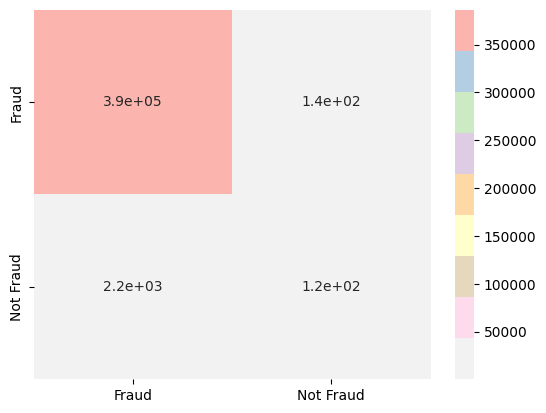

In [ ]:
sns.heatmap(knn_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])
# Column Actual val, Row Predicted val

# Logistic Regression

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_MinMaxscaled,y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_regression.predict(X_test_MinMaxscaled)

In [ ]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test.iloc[i]:
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
lr_accuracy_withoutundersample = (1-error)
print( "Accuracy = %f " % (lr_accuracy_withoutundersample*100) + '%' )

Error = 0.602309 %
Accuracy = 99.397691 %


In [ ]:
logistic_regression_cm = confusion_matrix(y_test, y_pred)
print(logistic_regression_cm)

[[386660     67]
 [  2276      0]]


<Axes: >

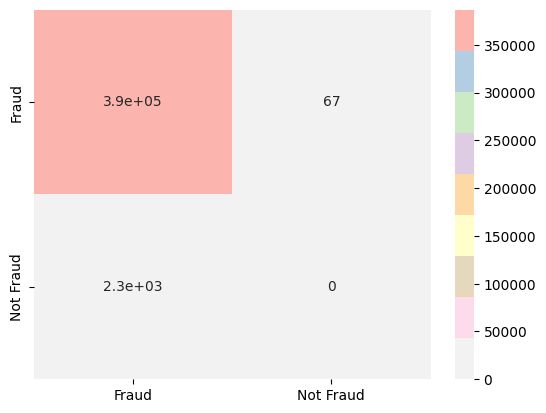

In [ ]:
sns.heatmap(logistic_regression_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

# Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_MinMaxscaled, y_train)

GaussianNB()

In [ ]:
y_pred = naive_bayes.predict(X_test_MinMaxscaled)

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_pred[i] != y_test.iloc[i]:
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
nb_accuracy_withoutundersample = (1-error)
print( "Accuracy = %f " % (nb_accuracy_withoutundersample*100) + '%' )

Error = 1.281995 %
Accuracy = 98.718005 %


In [ ]:
logistic_regression_cm = confusion_matrix(y_test, y_pred)
print(logistic_regression_cm)

[[382898   3829]
 [  1158   1118]]


<Axes: >

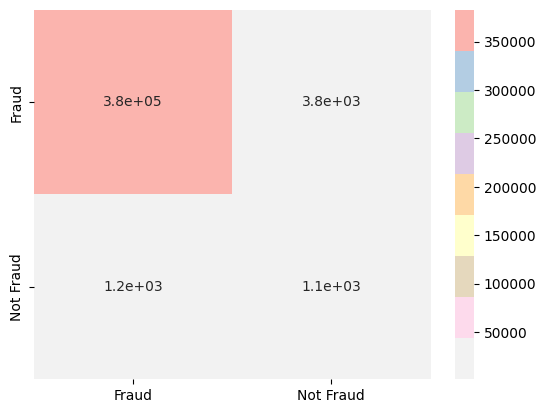

In [ ]:
sns.heatmap(logistic_regression_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

# Under Sampling

In [ ]:
updated_dataset = dataset[['cc_num', 'amt', 'lat', 'city_pop', 'unix_time', 'merchant_enc','category_enc', 'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc','job_enc', 'Month','is_fraud']]
fraud = updated_dataset[dataset.is_fraud==1]
not_fraud =  updated_dataset[updated_dataset.is_fraud==0]
sampled_not_fraud = not_fraud.sample(n=fraud.shape[0])            #Sample randomly selects rows and make a dataset
updated_dataset = pd.concat([fraud, sampled_not_fraud])
print(fraud.shape)
updated_dataset.shape

(7506, 16)


(15012, 16)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(updated_dataset[['cc_num', 'amt', 'lat', 'city_pop', 'unix_time', 'merchant_enc',
                            'category_enc', 'first_enc', 'last_enc', 'gender_enc', 'street_enc', 'city_enc', 'state_enc',
                            'job_enc', 'Month']], updated_dataset['is_fraud'], test_size=0.30, random_state=0)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_MinMaxscaled = scaler.transform(X_train)
X_train_MinMaxscaled

array([[3.60493367e-05, 1.92534720e-02, 2.29018004e-01, ...,
        2.00000000e-02, 8.90466531e-01, 0.00000000e+00],
       [6.96170037e-05, 2.38058114e-03, 5.31695317e-01, ...,
        4.20000000e-01, 5.45638945e-01, 9.09090909e-01],
       [6.04988560e-06, 2.71180211e-01, 3.79083791e-01, ...,
        8.80000000e-01, 4.36105477e-01, 2.72727273e-01],
       ...,
       [8.61802149e-04, 4.35465369e-03, 4.89090605e-01, ...,
        2.40000000e-01, 2.02839757e-01, 3.63636364e-01],
       [9.33828659e-01, 3.65022442e-02, 4.46327320e-01, ...,
        7.60000000e-01, 6.49087221e-01, 1.00000000e+00],
       [8.91640562e-04, 3.05115326e-01, 3.09270950e-01, ...,
        4.00000000e-02, 5.72008114e-01, 5.45454545e-01]])

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test_MinMaxscaled = scaler.transform(X_test)
X_test_MinMaxscaled

array([[3.60620399e-05, 3.67231092e-01, 5.08513657e-01, ...,
        7.40000000e-01, 4.05679513e-01, 9.09090909e-01],
       [8.33261330e-07, 3.64288018e-01, 4.88473456e-01, ...,
        4.40000000e-01, 3.24543611e-02, 0.00000000e+00],
       [6.88270668e-05, 1.08385744e-01, 2.98027266e-01, ...,
        8.00000000e-01, 1.66328600e-01, 9.09090909e-02],
       ...,
       [8.41230157e-07, 4.10820835e-03, 3.68870832e-01, ...,
        3.40000000e-01, 2.08924949e-01, 8.18181818e-01],
       [7.08114240e-04, 4.00044348e-01, 4.29201435e-01, ...,
        3.00000000e-01, 6.79513185e-01, 1.81818182e-01],
       [1.15900174e-07, 5.01209482e-02, 3.67855107e-01, ...,
        2.80000000e-01, 5.82150101e-01, 4.54545455e-01]])

In [ ]:
# KNN Model
knn=KNeighborsClassifier()
knn.fit(X_train_MinMaxscaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_MinMaxscaled)

In [ ]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test.iloc[i]:
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
knn_accuracy = (1-error)
print( "Accuracy = %f " % (knn_accuracy*100) + '%' )

Error = 24.067496 %
Accuracy = 75.932504 %


In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

[[1494  789]
 [ 295 1926]]


<Axes: >

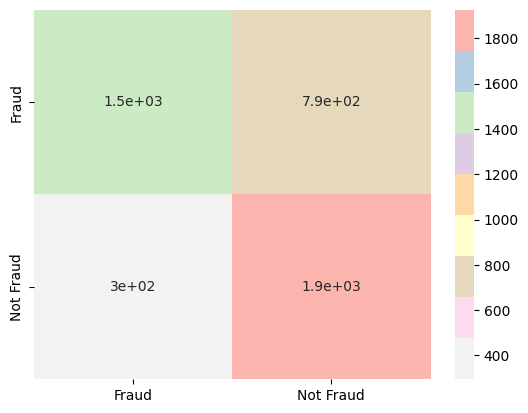

In [ ]:
sns.heatmap(knn_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

In [ ]:
#logistic_regression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_MinMaxscaled,y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_regression.predict(X_test_MinMaxscaled)

In [ ]:
count = 0
for i in range( len(y_test) ):
    if y_pred[i] != y_test.iloc[i]:
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
lr_accuracy = (1-error)
print( "Accuracy = %f " % (lr_accuracy*100) + '%' )

Error = 16.696270 %
Accuracy = 83.303730 %


In [ ]:
logistic_regression_cm = confusion_matrix(y_test, y_pred)
print(logistic_regression_cm)

[[2051  232]
 [ 520 1701]]


<Axes: >

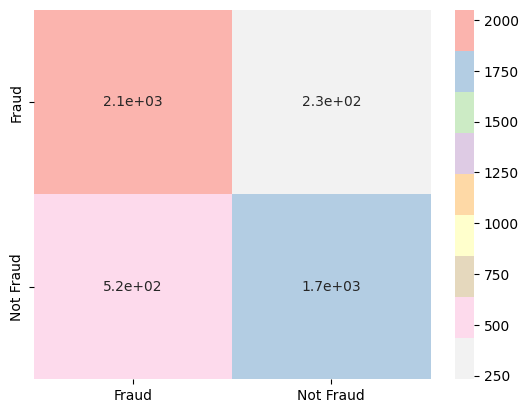

In [ ]:
sns.heatmap(logistic_regression_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

In [ ]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_MinMaxscaled, y_train)

GaussianNB()

In [ ]:
y_pred = naive_bayes.predict(X_test_MinMaxscaled)

In [ ]:
count = 0
for i in range(len(y_test)):
    if y_pred[i] != y_test.iloc[i]:
        count = count + 1
error = count/len(y_pred)
print( "Error = %f " % (error*100) + '%' )
nb_accuracy = (1-error)
print( "Accuracy = %f " % (nb_accuracy*100) + '%' )

Error = 15.586146 %
Accuracy = 84.413854 %


In [ ]:
logistic_regression_cm = confusion_matrix(y_test, y_pred)
print(logistic_regression_cm)

[[2123  160]
 [ 542 1679]]


<Axes: >

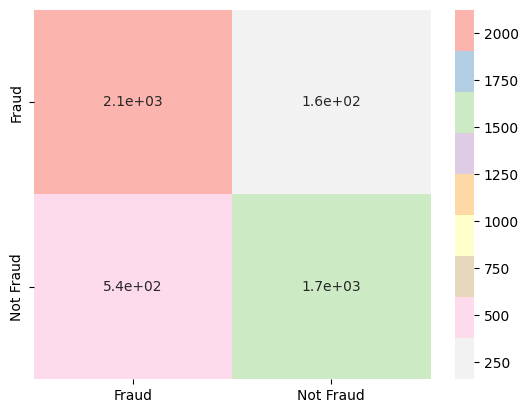

In [ ]:
sns.heatmap(logistic_regression_cm, annot=True, cmap='Pastel1_r', xticklabels=['Fraud' ,'Not Fraud'],yticklabels=['Fraud' ,'Not Fraud'])

# Comparison

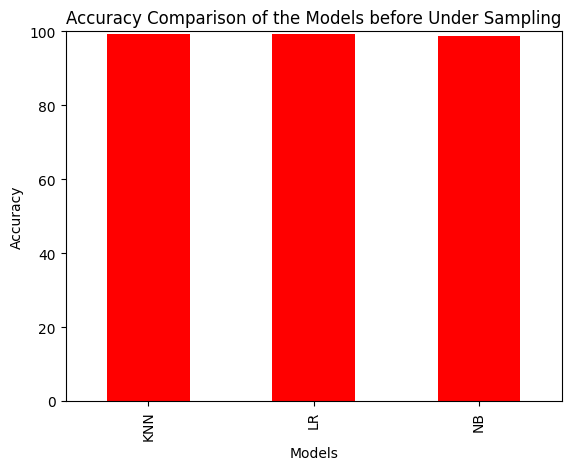

In [ ]:
# WithOut Undersampling

accuracy = {'Model': ['KNN', 'LR', 'NB'],
        'Accuracy': [knn_accuracy_withoutUndersample*100, lr_accuracy_withoutundersample*100, nb_accuracy_withoutundersample*100]}
df = pd.DataFrame(accuracy)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='red', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of the Models before Under Sampling')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

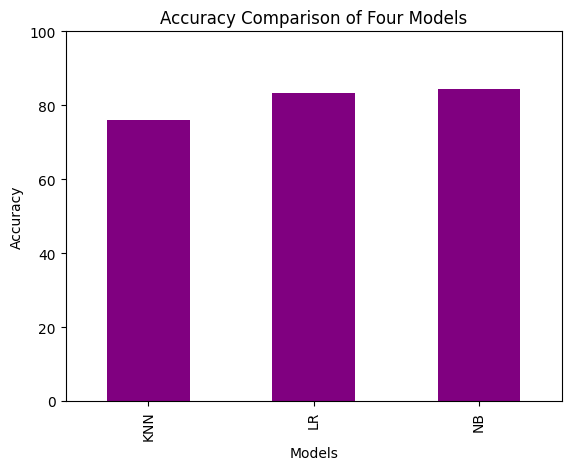

In [ ]:
# With Undersampling

accuracy2 = {'Model': ['KNN', 'LR', 'NB'],
        'Accuracy': [knn_accuracy*100, lr_accuracy*100, nb_accuracy*100]}
df = pd.DataFrame(accuracy2)
ax = df.plot(kind='bar', x='Model', y='Accuracy', color='purple', legend=False)
ax.set_ylim([0, 100])
ax.set_title('Accuracy Comparison of Four Models')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
plt.show()

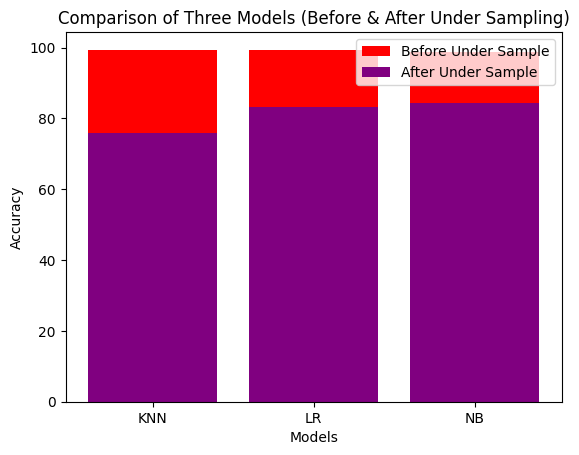

In [ ]:
dict1 = {'KNN':knn_accuracy_withoutUndersample*100, 'LR':lr_accuracy_withoutundersample*100, 'NB':nb_accuracy_withoutundersample*100}

dict2 ={'KNN':knn_accuracy*100, 'LR':lr_accuracy*100, 'NB':nb_accuracy*100}

keys = list(dict1.keys())
values_dict1 = list(dict1.values())
values_dict2 = list(dict2.values())

plt.bar(keys, values_dict1, label='Before Under Sample', color='red')
plt.bar(keys, values_dict2, label='After Under Sample', color='purple')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Three Models (Before & After Under Sampling)')
plt.legend()

plt.show()